Initialization

In [236]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Data Initial Exploratory

In [237]:
#load dataset
df = pd.read_csv('C:/Users/josep/OneDrive/Desktop/small python project/book store/best sellin books total.csv', 
                  encoding='latin1')
df

,Book name,Author,Rating,reviews count,form,price,Reading age,Print Length,Publishing date,Genre,id_2023,id_2024,id_2025
0,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8 out of 5 stars,145747,Hardcover,$18.88,NaN,320.0,16/10/2018,Self-Improvement,#1,#3,#6
1,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7 out of 5 stars,395512,Hardcover,$11.05,NaN,640.0,07/11/2023,Fiction & Action & Adventure,#2,#13,NaN
2,Spare,Prince Harry The Duke of Sussex,4.5 out of 5 stars,116101,Hardcover,$11.99,NaN,416.0,"January 10, 2023",Biographies & Memoirs,#3,NaN,NaN
3,Fourth Wing,Rebecca Yarros,4.8 out of 5 stars,472618,Paperback,$13.62,NaN,544.0,17/09/2024,Fiction & Action & Adventure,#4,#16,#76
4,The Woman in Me,Britney Spears,4.4 out of 5 stars,51520,Hardcover,$11.37,NaN,288.0,"October 24, 2023",Biographies & Memoirs,#5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,A People's History of the United States,Howard Zinn,4.7 out of 5 stars,16848,Paperback,$17.98,NaN,784.0,17/11/2015,History,NaN,NaN,#92
206,Bob Books,"Bobby Lynn Maslen, Amy Jindra, Karen Wall",4.8 out of 5 stars,22304,Hardcover,$14.13,3 years and up,144.0,01/05/2006,Reading & Writing,NaN,NaN,#93
207,Alchemised,SenLinYu,4.7 out of 5 stars,22093,Hardcover,$9.64,NaN,1040.0,23/09/2025,Fiction & Action & Adventure,NaN,NaN,#96
208,"The Next Conversation: Argue Less, Talk More",Jefferson Fisher,4.9 out of 5 stars,3433,Hardcover,$9.65,NaN,304.0,18/03/2025,Business & Money,NaN,NaN,#97


In [238]:
#check shape and columns
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Book name        210 non-null    object 
 1   Author           210 non-null    object 
 2   Rating           210 non-null    object 
 3   reviews count    210 non-null    int64  
 4   form             210 non-null    object 
 5   price            210 non-null    object 
 6   Reading age      71 non-null     object 
 7   Print Length     208 non-null    float64
 8   Publishing date  210 non-null    object 
 9   Genre            210 non-null    object 
 10  id_2023          100 non-null    object 
 11  id_2024          110 non-null    object 
 12  id_2025          98 non-null     object 
dtypes: float64(1), int64(1), object(11)
memory usage: 21.5+ KB


(210, 13)

In [239]:
#check duplicate records
print(df.duplicated().sum())
df[df.duplicated()]

0


,Book name,Author,Rating,reviews count,form,price,Reading age,Print Length,Publishing date,Genre,id_2023,id_2024,id_2025


In [240]:
#check for null values
df.isna().sum()

#id_2023, 2024 and 2025 can be dropped as they are not needed for EDA

Book name            0
Author               0
Rating               0
reviews count        0
form                 0
price                0
Reading age        139
Print Length         2
Publishing date      0
Genre                0
id_2023            110
id_2024            100
id_2025            112
dtype: int64

In [241]:
#check null records for 'reading age'
df[df['Reading age'].isna()]

,Book name,Author,Rating,reviews count,form,price,Reading age,Print Length,Publishing date,Genre,id_2023,id_2024,id_2025
0,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8 out of 5 stars,145747,Hardcover,$18.88,NaN,320.0,16/10/2018,Self-Improvement,#1,#3,#6
1,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7 out of 5 stars,395512,Hardcover,$11.05,NaN,640.0,07/11/2023,Fiction & Action & Adventure,#2,#13,NaN
2,Spare,Prince Harry The Duke of Sussex,4.5 out of 5 stars,116101,Hardcover,$11.99,NaN,416.0,"January 10, 2023",Biographies & Memoirs,#3,NaN,NaN
3,Fourth Wing,Rebecca Yarros,4.8 out of 5 stars,472618,Paperback,$13.62,NaN,544.0,17/09/2024,Fiction & Action & Adventure,#4,#16,#76
4,The Woman in Me,Britney Spears,4.4 out of 5 stars,51520,Hardcover,$11.37,NaN,288.0,"October 24, 2023",Biographies & Memoirs,#5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,My Friends,Fredrik Backman,4.6 out of 5 stars,50581,Hardcover,$12.97,NaN,448.0,06/05/2025,Fiction & Action & Adventure,NaN,NaN,#86
205,A People's History of the United States,Howard Zinn,4.7 out of 5 stars,16848,Paperback,$17.98,NaN,784.0,17/11/2015,History,NaN,NaN,#92
207,Alchemised,SenLinYu,4.7 out of 5 stars,22093,Hardcover,$9.64,NaN,1040.0,23/09/2025,Fiction & Action & Adventure,NaN,NaN,#96
208,"The Next Conversation: Argue Less, Talk More",Jefferson Fisher,4.9 out of 5 stars,3433,Hardcover,$9.65,NaN,304.0,18/03/2025,Business & Money,NaN,NaN,#97


In [242]:
#check unique values in important columns
print(df['Rating'].unique())
print('\n', df['price'].unique())
print('\n', df['Reading age'].unique())

['4.8 out of 5 stars' '4.7 out of 5 stars' '4.5 out of 5 stars'
 '4.4 out of 5 stars' '4.6 out of 5 stars' '4.9 out of 5 stars'
 '4.2 out of 5 stars' '4.3 out of 5 stars' '4.1 out of 5 stars']

 ['$18.88' '$11.05' '$11.99' '$13.62' '$11.37' '$13.94' '$13.99' '$14.39'
 '$1.88' '$18.00' '$9.03' '$9.69' '$5.75' '$9.99' '$12.09' '$6.91'
 '$16.99' '$4.35' '$7.05' '$17.10' '$12.80' '$10.41' '$2.03' '$3.97'
 '$5.48' '$9.77' '$17.96' '$4.82' '$16.78' '$5.37' '$10.83' '$7.34'
 '$14.47' '$8.64' '$14.99' '$6.88' '$1.89' '$13.28' '$9.45' '$26.91'
 '$2.39' '$14.53' '$14.18' '$23.66' '$14.78' '$2.70' '$9.40' '$9.95'
 '$12.16' '$20.19' '$19.93' '$10.17' '$17.18' '$5.60' '$8.91' '$4.23'
 '$12.29' '$9.74' '$4.17' '$13.97' '$13.47' '$9.25' '$8.18' '$13.98'
 '$15.05' '$3.07' '$8.24' '$9.33' '$47.90' '$15.44' '$17.62' '$24.99'
 '$24.62' '$12.97' '$9.82' '$13.48' '$52.62' '$10.21' '$10.20' '$12.81'
 '$13.43' '$14.71' '$21.74' '$5.03' '$4.98' '$5.96' '$10.18' '$9.43'
 '$7.16' '$12.00' '$5.26' '$5.71' '$12.7

In [243]:
print(df['Publishing date'].unique())

['16/10/2018' '07/11/2023' 'January 10, 2023' '17/09/2024'
 'October 24, 2023' 'April 5, 2022' '01/09/2000' '08/09/2015' '18/10/2022'
 '28/03/2023' '02/08/2016' '23/08/2022' '23/03/1994' 'April 3, 2018'
 '26/10/2021' '29/05/2018' '17/01/2023' '02/05/2023' '07/11/1997'
 'October 18, 2022' '02/06/2020' '18/07/2022' '03/03/2015'
 'March 28, 2023' 'January 12, 2022' 'May 2, 2023' '15/09/1996'
 'July 25, 2023' '07/01/2020' 'November 1, 2022' 'April 18, 2023'
 '22/01/1990' '25/04/2018' '01/11/2019' 'August 2, 1991' 'July 5, 2022'
 '31/01/2013' '25/08/2015' 'November 7, 2023' '04/05/2021' '03/05/2022'
 '08/09/2020' 'November 2, 2021' 'December 5, 2023' 'January 25, 2022'
 'September 27, 2022' 'February 7, 2023' 'February 21, 2023'
 'January 18, 2022' 'July 7, 2023' 'September 12, 2023' 'May 14, 2019'
 '13/08/2021' 'September 3, 2019' 'August 5, 2014' 'June 3, 2014'
 'April 25, 2023' '01/01/2012' 'March 14, 2023' 'September 19, 2023'
 'January 26, 2016' 'May 6, 2003' 'September 5, 2023' '08/08

In [244]:
print(df['Genre'].unique())

['Self-Improvement' 'Fiction & Action & Adventure' 'Biographies & Memoirs'
 'Politics & Social Sciences' 'Health & Fitness & Dieting'
 'Mystery & Thriller & Suspense' 'Reading & Writing'
 'Arts & Music & Photography' 'Puzzles & Games' 'Comics & Graphic Novels'
 'Cookbooks & Food' 'Humor & Entertainment' 'Business & Money'
 'Computers & Technology' 'Romance' 'Schools & Teaching' 'History'
 'Parenting & Relationships' 'Bible Study & Reference' 'Engineering'
 'Friendship & Social Skills & School Life']


Data Cleaning

In [245]:
#drop unnecessary columns
df = df.drop(columns=['id_2023','id_2024','id_2025'])
df

,Book name,Author,Rating,reviews count,form,price,Reading age,Print Length,Publishing date,Genre
0,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8 out of 5 stars,145747,Hardcover,$18.88,NaN,320.0,16/10/2018,Self-Improvement
1,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7 out of 5 stars,395512,Hardcover,$11.05,NaN,640.0,07/11/2023,Fiction & Action & Adventure
2,Spare,Prince Harry The Duke of Sussex,4.5 out of 5 stars,116101,Hardcover,$11.99,NaN,416.0,"January 10, 2023",Biographies & Memoirs
3,Fourth Wing,Rebecca Yarros,4.8 out of 5 stars,472618,Paperback,$13.62,NaN,544.0,17/09/2024,Fiction & Action & Adventure
4,The Woman in Me,Britney Spears,4.4 out of 5 stars,51520,Hardcover,$11.37,NaN,288.0,"October 24, 2023",Biographies & Memoirs
...,...,...,...,...,...,...,...,...,...,...
205,A People's History of the United States,Howard Zinn,4.7 out of 5 stars,16848,Paperback,$17.98,NaN,784.0,17/11/2015,History
206,Bob Books,"Bobby Lynn Maslen, Amy Jindra, Karen Wall",4.8 out of 5 stars,22304,Hardcover,$14.13,3 years and up,144.0,01/05/2006,Reading & Writing
207,Alchemised,SenLinYu,4.7 out of 5 stars,22093,Hardcover,$9.64,NaN,1040.0,23/09/2025,Fiction & Action & Adventure
208,"The Next Conversation: Argue Less, Talk More",Jefferson Fisher,4.9 out of 5 stars,3433,Hardcover,$9.65,NaN,304.0,18/03/2025,Business & Money


In [246]:
#standardizing columns
new_cols = [col.title() for col in df.columns]
df.columns = new_cols

In [247]:
#fixing rating to just float
df['Rating'] = df['Rating'].str.replace(' out of 5 stars', '', regex=False)
df['Rating'] = df['Rating'].astype(float)
df

,Book Name,Author,Rating,Reviews Count,Form,Price,Reading Age,Print Length,Publishing Date,Genre
0,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,145747,Hardcover,$18.88,NaN,320.0,16/10/2018,Self-Improvement
1,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7,395512,Hardcover,$11.05,NaN,640.0,07/11/2023,Fiction & Action & Adventure
2,Spare,Prince Harry The Duke of Sussex,4.5,116101,Hardcover,$11.99,NaN,416.0,"January 10, 2023",Biographies & Memoirs
3,Fourth Wing,Rebecca Yarros,4.8,472618,Paperback,$13.62,NaN,544.0,17/09/2024,Fiction & Action & Adventure
4,The Woman in Me,Britney Spears,4.4,51520,Hardcover,$11.37,NaN,288.0,"October 24, 2023",Biographies & Memoirs
...,...,...,...,...,...,...,...,...,...,...
205,A People's History of the United States,Howard Zinn,4.7,16848,Paperback,$17.98,NaN,784.0,17/11/2015,History
206,Bob Books,"Bobby Lynn Maslen, Amy Jindra, Karen Wall",4.8,22304,Hardcover,$14.13,3 years and up,144.0,01/05/2006,Reading & Writing
207,Alchemised,SenLinYu,4.7,22093,Hardcover,$9.64,NaN,1040.0,23/09/2025,Fiction & Action & Adventure
208,"The Next Conversation: Argue Less, Talk More",Jefferson Fisher,4.9,3433,Hardcover,$9.65,NaN,304.0,18/03/2025,Business & Money


In [248]:
#fixing price to just float
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].astype(float)
df

,Book Name,Author,Rating,Reviews Count,Form,Price,Reading Age,Print Length,Publishing Date,Genre
0,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,145747,Hardcover,18.88,NaN,320.0,16/10/2018,Self-Improvement
1,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7,395512,Hardcover,11.05,NaN,640.0,07/11/2023,Fiction & Action & Adventure
2,Spare,Prince Harry The Duke of Sussex,4.5,116101,Hardcover,11.99,NaN,416.0,"January 10, 2023",Biographies & Memoirs
3,Fourth Wing,Rebecca Yarros,4.8,472618,Paperback,13.62,NaN,544.0,17/09/2024,Fiction & Action & Adventure
4,The Woman in Me,Britney Spears,4.4,51520,Hardcover,11.37,NaN,288.0,"October 24, 2023",Biographies & Memoirs
...,...,...,...,...,...,...,...,...,...,...
205,A People's History of the United States,Howard Zinn,4.7,16848,Paperback,17.98,NaN,784.0,17/11/2015,History
206,Bob Books,"Bobby Lynn Maslen, Amy Jindra, Karen Wall",4.8,22304,Hardcover,14.13,3 years and up,144.0,01/05/2006,Reading & Writing
207,Alchemised,SenLinYu,4.7,22093,Hardcover,9.64,NaN,1040.0,23/09/2025,Fiction & Action & Adventure
208,"The Next Conversation: Argue Less, Talk More",Jefferson Fisher,4.9,3433,Hardcover,9.65,NaN,304.0,18/03/2025,Business & Money


In [249]:
#fixing reading age column
#since NA age is not specified, set to 'everyone'
df['Reading Age'] = df['Reading Age'].fillna('Everyone')
df['Reading Age'] = (
    df['Reading Age']
    .str.replace(' years and up', '+', regex=False)
    .str.replace(' year and up', '+', regex=False)
    .str.replace(' and up', '+', regex=False)
    .str.replace(' years', '', regex=False)
)
df['Reading Age'].unique()


array(['Everyone', '18+', '1 - 2', '5+', '8+', 'baby+', '7+', '1+',
       '3 - 4', '3+', '2+', '4+', '12+ ', '9+', '6+', '16+', '14+', '15+',
       '12+'], dtype=object)

In [250]:
#fixing date column
df['Publishing Date'] = pd.to_datetime(df['Publishing Date'], errors='coerce', format='mixed')
df['Publishing Date'] = df['Publishing Date'].dt.strftime('%d/%m/%Y')
df['Publishing Date'] = pd.to_datetime(df['Publishing Date'], dayfirst=True)
df

,Book Name,Author,Rating,Reviews Count,Form,Price,Reading Age,Print Length,Publishing Date,Genre
0,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,145747,Hardcover,18.88,Everyone,320.0,2018-10-16,Self-Improvement
1,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7,395512,Hardcover,11.05,Everyone,640.0,2023-07-11,Fiction & Action & Adventure
2,Spare,Prince Harry The Duke of Sussex,4.5,116101,Hardcover,11.99,Everyone,416.0,2023-01-10,Biographies & Memoirs
3,Fourth Wing,Rebecca Yarros,4.8,472618,Paperback,13.62,Everyone,544.0,2024-09-17,Fiction & Action & Adventure
4,The Woman in Me,Britney Spears,4.4,51520,Hardcover,11.37,Everyone,288.0,2023-10-24,Biographies & Memoirs
...,...,...,...,...,...,...,...,...,...,...
205,A People's History of the United States,Howard Zinn,4.7,16848,Paperback,17.98,Everyone,784.0,2015-11-17,History
206,Bob Books,"Bobby Lynn Maslen, Amy Jindra, Karen Wall",4.8,22304,Hardcover,14.13,3+,144.0,2006-01-05,Reading & Writing
207,Alchemised,SenLinYu,4.7,22093,Hardcover,9.64,Everyone,1040.0,2025-09-23,Fiction & Action & Adventure
208,"The Next Conversation: Argue Less, Talk More",Jefferson Fisher,4.9,3433,Hardcover,9.65,Everyone,304.0,2025-03-18,Business & Money


In [251]:
#cleaned dataset
print(df.shape)
print(df.info())
df.head(10)

(210, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Book Name        210 non-null    object        
 1   Author           210 non-null    object        
 2   Rating           210 non-null    float64       
 3   Reviews Count    210 non-null    int64         
 4   Form             210 non-null    object        
 5   Price            210 non-null    float64       
 6   Reading Age      210 non-null    object        
 7   Print Length     208 non-null    float64       
 8   Publishing Date  210 non-null    datetime64[ns]
 9   Genre            210 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 16.5+ KB
None


,Book Name,Author,Rating,Reviews Count,Form,Price,Reading Age,Print Length,Publishing Date,Genre
0,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,145747,Hardcover,18.88,Everyone,320.0,2018-10-16,Self-Improvement
1,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7,395512,Hardcover,11.05,Everyone,640.0,2023-07-11,Fiction & Action & Adventure
2,Spare,Prince Harry The Duke of Sussex,4.5,116101,Hardcover,11.99,Everyone,416.0,2023-01-10,Biographies & Memoirs
3,Fourth Wing,Rebecca Yarros,4.8,472618,Paperback,13.62,Everyone,544.0,2024-09-17,Fiction & Action & Adventure
4,The Woman in Me,Britney Spears,4.4,51520,Hardcover,11.37,Everyone,288.0,2023-10-24,Biographies & Memoirs
5,Lessons in Chemistry: A Novel,Bonnie Garmus,4.6,322650,Hardcover,13.94,Everyone,400.0,2022-04-05,Fiction & Action & Adventure
6,The 48 Laws of Power,Robert Greene,4.7,87375,Paperback,13.99,Everyone,452.0,2000-01-09,Politics & Social Sciences
7,"The Body Keeps the Score: Brain, Mind, and Bod...",Bessel van der Kolk M.D.,4.8,82564,Paperback,14.39,18+,464.0,2015-08-09,Health & Fitness & Dieting
8,It Starts with Us: A Novel (It Ends with Us),Colleen Hoover,4.5,228242,Paperback,1.88,Everyone,336.0,2022-10-18,Fiction & Action & Adventure
9,Outlive: The Science and Art of Longevity,Peter Attia MD,4.6,19946,Hardcover,18.00,Everyone,496.0,2023-03-28,Health & Fitness & Dieting


In [252]:
#drop duplicate records
print(df[df.duplicated()])
df = df.drop_duplicates()

                                             Book Name  \
103                                      The Housemaid   
107                           It Ends with Us: A Novel   
115                    I Love You to the Moon and Back   
117                           A Court of Mist and Fury   
123                          A Court of Wings and Ruin   
124                        The Very Hungry Caterpillar   
131                     A Court of Frost and Starlight   
136              How to Win Friends & Influence People   
137              The Complete Cookbook for Young Chefs   
146               What to Expect When You're Expecting   
149  Dad, I Want to Hear Your Story: A Fathers Gui...   
158  Mom, I Want to Hear Your Story: A Mothers Gui...   
160                                 Dragons Love Tacos   
177                          Oh, the Places You'll Go!   

                              Author  Rating  Reviews Count        Form  \
103                  Freida McFadden     4.5         6

EDA section

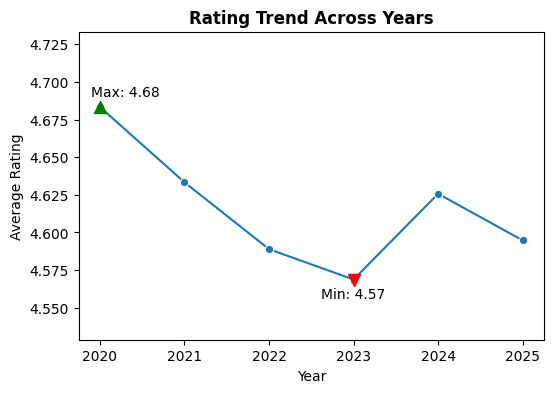

In [253]:
#1 : Finding the average rating across last 5 years 
temp_df = df.copy()
temp_df['Year'] = temp_df['Publishing Date'].dt.year
temp_df = temp_df[temp_df['Year'] >= 2020]
temp_df = temp_df.groupby('Year')['Rating'].mean().reset_index(name='Rating')

max_df = temp_df['Rating'].idxmax()
max_df = temp_df.iloc[max_df, :]

min_df = temp_df['Rating'].idxmin()
min_df = temp_df.iloc[min_df, :]
y_min, y_max = temp_df['Rating'].min(), temp_df['Rating'].max()

plt.figure(figsize=(6,4))
sns.lineplot(x='Year', y='Rating', data=temp_df, marker='o')
plt.title('Rating Trend Across Years',weight='bold')
plt.ylabel('Average Rating')

plt.scatter(max_df['Year'], max_df['Rating'], marker='^', s=75, zorder=5, color='green')
plt.text(max_df['Year']  + 0.3, max_df['Rating'] + 0.005, f"Max: {max_df['Rating']:.2f}", verticalalignment='bottom', ha='center')
plt.scatter(min_df['Year'], min_df['Rating'], marker='v', s=75, zorder=5, color='red')
plt.text(min_df['Year'], min_df['Rating'] - 0.005, f"Min: {min_df['Rating']:.2f}", verticalalignment='top', ha='center')
plt.ylim(y_min - 0.04, y_max + 0.05)
plt.show()

In [254]:
#2 : Best books to recommend for each reading age group (rating vs reading age)
temp_df = df.copy()
temp_df = (
    temp_df.groupby('Reading Age', group_keys=False)[['Book Name', 'Reading Age', 'Rating']]
      .apply(lambda x: x.nlargest(3, 'Rating'))
      .reset_index(drop=True)
)
temp_df

,Book Name,Reading Age,Rating
0,The Very Hungry Caterpillar,1 - 2,4.9
1,"Brown Bear, Brown Bear, What Do You See?",1 - 2,4.9
2,Chicka Chicka Boom Boom,1 - 2,4.9
3,From Crook to Cook: Platinum Recipes from Tha ...,1+,4.8
4,The Book of Bill,1+,4.8
5,8 Little Planets,1+,4.8
6,Sunrise on the Reaping (The Hunger Games),12+,4.7
7,Forgotten Home Apothecary : 250 Powerful Remed...,12+,4.7
8,The Complete Summer I Turned Pretty Trilogy (B...,12+,4.8
9,The Ballad of Songbirds and Snakes,12+,4.5


In [255]:
#3 : Books with poorer ratings but high cost (rating vs print length)
temp_df = df.copy() 
temp_df = temp_df[temp_df['Rating'] < 4.3]
printLength_df = temp_df.sort_values(by=['Rating','Print Length'], ascending=[True,False]).nsmallest(10, 'Rating')[['Book Name', 'Print Length', 'Rating']]
printLength_df

,Book Name,Print Length,Rating
77,The Exchange: After The Firm (The Firm Series),352.0,4.1
35,If He Had Been with Me,400.0,4.2
59,Happy Place,400.0,4.2
113,The Housemaid Is Watching,400.0,4.2
194,The Crash,384.0,4.2
188,The Tenant,368.0,4.2
47,Twisted Love,352.0,4.2
99,A Court of Frost and Starlight,272.0,4.2


C:\Users\josep\AppData\Local\Temp\ipykernel_22216\1922859321.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'Count'))


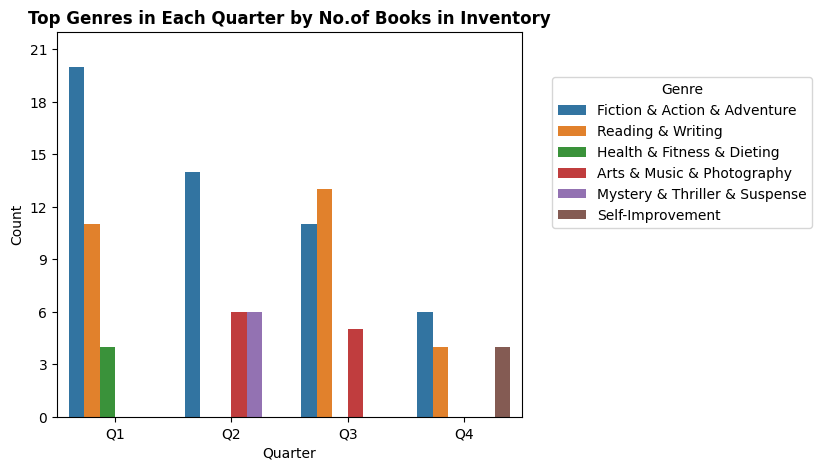

,Quarter,Genre,Count
0,Q1,Fiction & Action & Adventure,20
1,Q1,Reading & Writing,11
2,Q1,Health & Fitness & Dieting,4
3,Q2,Fiction & Action & Adventure,14
4,Q2,Arts & Music & Photography,6
5,Q2,Mystery & Thriller & Suspense,6
6,Q3,Reading & Writing,13
7,Q3,Fiction & Action & Adventure,11
8,Q3,Arts & Music & Photography,5
9,Q4,Fiction & Action & Adventure,6


In [256]:
#4 : Finding which genres are ordered more in each quarter (genre vs month)
temp_df = df.copy()
temp_df['Month'] = temp_df['Publishing Date'].dt.month
month_to_quarter = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                    4: 'Q2', 5: 'Q2', 6: 'Q2',
                    7: 'Q3', 8: 'Q3', 9: 'Q3',
                    10:'Q4', 11:'Q4', 12:'Q4'}

temp_df['Quarter'] = temp_df['Month'].map(month_to_quarter)
temp_df = temp_df.groupby(['Quarter','Genre']).size().reset_index(name='Count')
temp_df = (
    temp_df.groupby('Quarter', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'Count'))
    .reset_index(drop=True)
)
y_max = temp_df['Count'].max()



plt.figure(figsize=(6,5))
sns.barplot(x='Quarter', y='Count', hue='Genre', data=temp_df)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.title('Top Genres in Each Quarter by No.of Books in Inventory', weight='bold')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 0.9), loc='upper left')
plt.ylim(0, y_max + 2)
plt.show()

temp_df

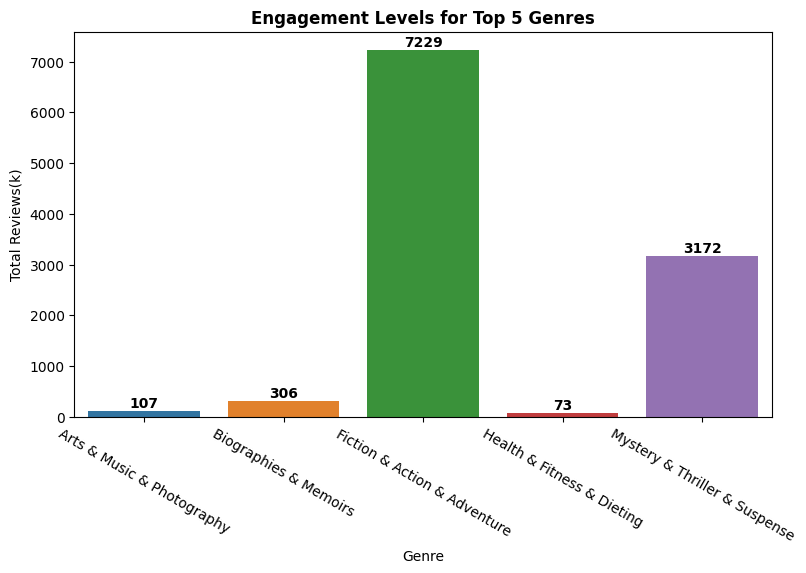

,Genre,Total Reviews,Total Reviews (k)
2,Fiction & Action & Adventure,7228549,7228.549
4,Mystery & Thriller & Suspense,3172132,3172.132
1,Biographies & Memoirs,306010,306.010
0,Arts & Music & Photography,107285,107.285
3,Health & Fitness & Dieting,72520,72.520


In [257]:
#5 : Finding genres with high reviews count (genre - reviews count)
temp_df = df.copy()
temp_df['Year'] = temp_df['Publishing Date'].dt.year
temp_df = temp_df[temp_df['Year'] >= 2020]

top_genres = temp_df.groupby('Genre').size().nlargest(5).index.tolist()

temp_df = (
    temp_df[temp_df['Genre'].isin(top_genres)]
    .groupby('Genre')['Reviews Count'].sum()
    .reset_index(name='Total Reviews')
)
temp_df['Total Reviews (k)'] = temp_df['Total Reviews'] / 1000

plt.figure(figsize=(9,5))
ax = sns.barplot(x='Genre', y='Total Reviews (k)', data=temp_df, hue='Genre')
plt.title('Engagement Levels for Top 5 Genres', weight='bold')
plt.ylabel('Total Reviews(k)')
plt.tick_params(axis='x', rotation=-30)

for p in ax.patches:
    height = p.get_height()  
    ax.text(
        p.get_x() + p.get_width()/2,  
        height + 10,                  
        f"{height:.0f}",             
        ha='center',                  
        va='bottom',                  
        weight='bold'
    )

plt.show()

temp_df = temp_df.sort_values(by='Total Reviews', ascending=False)
temp_df